In [1]:
import dsmanipulator.dsloader as dsl
import dsmanipulator.dscreator as dsc
import dsmanipulator.dsanalyzer as dsa

from dsmanipulator.utils.dataobjects import FileColumnNames, Station


from bidict import bidict
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator


import pickle

In [13]:
k = pd.read_pickle("save/df.pkl")
k[(k.srcIP == "192.168.11.248") & (k.srcPort == 2404) & (k.dstIP == "192.168.11.111") & (k.dstPort == 49830)]
k[(k.dstIP == "192.168.11.248") & (k.dstPort == 2404) & (k.srcIP == "192.168.11.111") & (k.srcPort == 49830)]



,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,asduType,numix,cot,oa,addr,ioa
9905,2022-03-14 13:20:04.970,1014.657185,192.168.11.111,192.168.11.248,49830,2404,46,4,0x00000003,0x00000001,NaN,NaN,NaN,NaN,NaN,NaN
9907,2022-03-14 13:20:05.040,1014.735283,192.168.11.111,192.168.11.248,49830,2404,59,17,0x00000000,NaN,122.0,1.0,13.0,0.0,65535.0,65537
9909,2022-03-14 13:20:05.050,1014.738133,192.168.11.111,192.168.11.248,49830,2404,59,17,0x00000000,NaN,122.0,1.0,13.0,0.0,65535.0,65537
9911,2022-03-14 13:20:05.050,1014.738663,192.168.11.111,192.168.11.248,49830,2404,59,17,0x00000000,NaN,122.0,1.0,13.0,0.0,65535.0,65537
9924,2022-03-14 13:20:05.050,1014.741070,192.168.11.111,192.168.11.248,49830,2404,46,4,0x00000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12903,2022-03-14 13:28:56.650,1546.338939,192.168.11.111,192.168.11.248,49830,2404,46,4,0x00000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12908,2022-03-14 13:29:09.800,1559.490467,192.168.11.111,192.168.11.248,49830,2404,46,4,0x00000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12911,2022-03-14 13:29:21.860,1571.552039,192.168.11.111,192.168.11.248,49830,2404,46,4,0x00000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12913,2022-03-14 13:29:26.000,1575.690095,192.168.11.111,192.168.11.248,49830,2404,46,4,0x00000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


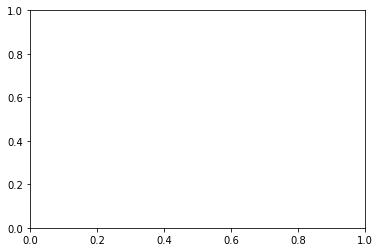

In [21]:
df = pd.read_pickle("save/dfb.pkl")
with open("save/fcn.pkl", "rb") as f:
    fcn = pickle.load(f)

In [22]:
from collections import namedtuple

Direction = namedtuple('Direction', 'src dst')

a =Direction(4,3)
a
a.src
type(a)

__main__.Direction

(0.0, 858.0)

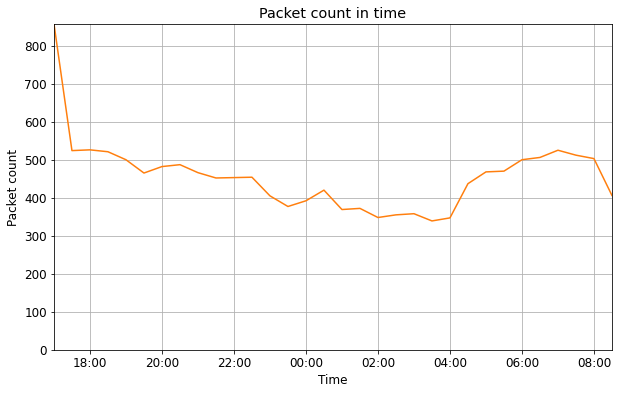

In [26]:
# s = df[fcn.timestamp]

time_series = pd.Series(df[fcn.timestamp].index, index=df[fcn.timestamp])
ts = time_series.resample('30min').count()


x = ts.index
y = ts.values
# plt.rc(usetex=True)
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, color='tab:orange')

ax.set_xlabel('Time')
ax.set_ylabel('Packet count')
ax.set_title('Packet count in time')
ax.grid(True)

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.xlim([min(x), max(x)])
plt.ylim([0, max(y)])


In [5]:
# s = df[df["l3commId"] == 1]
df[fcn.timestamp]
# TODO

time_series = pd.Series(df[fcn.timestamp])
ts = time_series.resample('30min').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [6]:
# time_series = pd.Series(s.values)
# ts = time_series.resample('30min').count()
s

,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,asduType,numix,cot,oa,addr,ioa,None,l3commId,l4commId
TimeStamp,,,,,,,,,,,,,,,,,,
2022-03-09 17:15:49.940,0.029377,192.168.11.248,192.168.11.111,2404,56693,61,19,0x00000000,NaN,120.0,1.0,13.0,0.0,65535.0,65537,0,1,1
2022-03-09 17:15:49.940,0.031586,192.168.11.248,192.168.11.111,2404,56693,62,20,0x00000000,NaN,121.0,1.0,13.0,0.0,65535.0,65537,0,1,1
2022-03-09 17:15:49.970,0.063326,192.168.11.248,192.168.11.111,2404,56693,576,253,0x00000000,NaN,125.0,1.0,13.0,0.0,65535.0,65537,0,1,1
2022-03-09 17:15:49.970,0.063326,192.168.11.248,192.168.11.111,2404,56693,576,253,0x00000000,NaN,125.0,1.0,13.0,0.0,65535.0,65537,0,1,1
2022-03-09 17:15:49.970,0.063327,192.168.11.248,192.168.11.111,2404,56693,73,57,0x00000000,NaN,125.0,1.0,13.0,0.0,65535.0,65537,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-10 08:53:29.480,56259.575381,192.168.11.248,192.168.11.111,2404,56693,67,25,0x00000000,NaN,36.0,1.0,3.0,0.0,65535.0,2,1,1,1
2022-03-10 08:53:33.280,56263.375167,192.168.11.248,192.168.11.111,2404,56693,67,25,0x00000000,NaN,36.0,1.0,3.0,0.0,65535.0,2,1,1,1
2022-03-10 08:53:37.280,56267.374012,192.168.11.248,192.168.11.111,2404,56693,67,25,0x00000000,NaN,36.0,1.0,3.0,0.0,65535.0,2,1,1,1


In [4]:
# col_names = FileColumnNames("TimeStamp", "Relative Time", "srcIP", "dstIP", "srcPort", "dstPort")
# %time df = dsl.load_data("data/mega104-14-12-18-ioa.csv", )
%time df = dsc.add_relative_days(df)
%time df = dsc.convert_to_timeseries(df)
# %time df = dsc.add_communication_id_l3(df)
# %time df = dsc.add_communication_id_l4(df)
# %time df = dsc.add_communication_direction(df, "192.168.11.111")
# %time df = dsc.add_inter_arrival_time_ad(df)
# %time df = dsc.add_inter_arrival_time_sd(df)

TypeError: add_relative_days() missing 1 required positional argument: 'fcn'

TypeError: convert_to_timeseries() missing 1 required positional argument: 'fcn'

In [ ]:
df["TimeStamp"].iloc[0] - df["TimeStamp"].iloc[-1]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14597 entries, 2022-02-22 17:15:49.910000 to 2022-02-23 08:53:51.080000
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   relTime             14597 non-null  float64 
 1   srcIp               14597 non-null  object  
 2   dstIp               14597 non-null  object  
 3   srcPort             14597 non-null  int64   
 4   dstPort             14597 non-null  int64   
 5   ipLen               14597 non-null  int64   
 6   len                 14597 non-null  int64   
 7   fmt                 14597 non-null  object  
 8   uType               1156 non-null   category
 9   asduType            9657 non-null   category
 10  numix               9657 non-null   category
 11  cot                 9657 non-null   category
 12  oa                  9657 non-null   category
 13  addr                9657 non-null   float64 
 14  ioa                 9657 non-null   o

,count
timeStamp,
2022-02-22 17:00:00,1382
2022-02-22 18:00:00,1047
2022-02-22 19:00:00,965
2022-02-22 20:00:00,969
2022-02-22 21:00:00,918
2022-02-22 22:00:00,907
2022-02-22 23:00:00,782
2022-02-23 00:00:00,812
2022-02-23 01:00:00,741


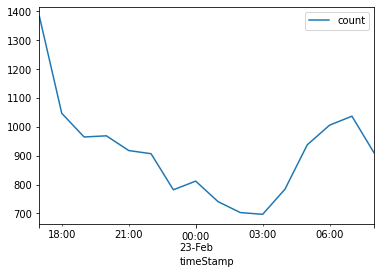

In [ ]:
df['count'] = True
x = df.loc[:,['count']]
x = x.resample('1h').sum()
x.plot()
x